print the abscissa for plot: x
print the ordinate for plot: z


<Figure size 432x288 with 0 Axes>

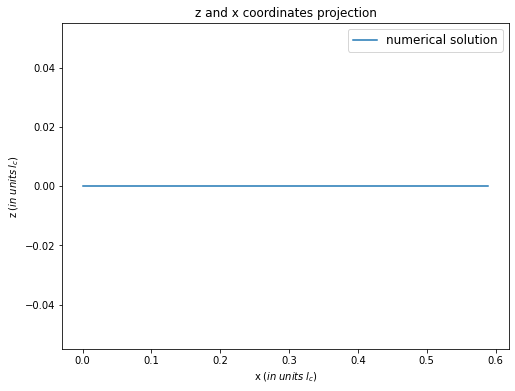

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sympy.abc import x, y, z, t
from sympy import sympify
from sympy import lambdify
from scipy import constants as con
from scipy import integrate
from mpl_toolkits import mplot3d
import math
from scipy.constants import e, m_e

class ElectromagneticField(object):
    def __init__(self, Ex = 0, Ey = 0, Ez = 0, Hx = 0, Hy = 0, Hz = 0):
        self.Ex = Ex
        self.Ey = Ey
        self.Ez = Ez
        self.Hx = Hx
        self.Hy = Hy
        self.Hz = Hz
        
    def components_field(self, x1, y1, z1, t1):
                         #E_only=True, H_only=True):
        self.E_H_components = np.zeros(6)
        self.E_H_components[0] = sympify(self.Ex).evalf(subs={x: x1, y: y1, z: z1, t: t1})
        self.E_H_components[1] = sympify(self.Ey).evalf(subs={x: x1, y: y1, z: z1, t: t1})
        self.E_H_components[2] = sympify(self.Ez).evalf(subs={x: x1, y: y1, z: z1, t: t1})
        self.E_H_components[3] = sympify(self.Hx).evalf(subs={x: x1, y: y1, z: z1, t: t1})
        self.E_H_components[4] = sympify(self.Hy).evalf(subs={x: x1, y: y1, z: z1, t: t1})
        self.E_H_components[5] = sympify(self.Hz).evalf(subs={x: x1, y: y1, z: z1, t: t1})

        '''
        self.H_components = np.zeros(3)
        self.H_components[0] = sympify(self.Hx).evalf(subs={x: x1, y: y1, z: z1, t: t1})
        self.H_components[1] = sympify(self.Hy).evalf(subs={x: x1, y: y1, z: z1, t: t1})
        self.H_components[2] = sympify(self.Hz).evalf(subs={x: x1, y: y1, z: z1, t: t1})
        '''
        #if E_only and H_only: 
        return self.E_H_components
        #if E_only: return self.E_components
        #if H_only: return self.H_components
        
    
    def module_squared(self, E_only=True, H_only=True):
        self.E_field_squared = np.sum((self.E_components)**2)
        self.H_field_squared = np.sum((self.H_components)**2)
        
        if E_only and H_only: return self.E_field_squared, self.H_field_squared
        if E_only: return self.E_field_squared
        if H_only: return self.H_field_squared
    
    def plot_field_components_in_plane(self):
        #отбор осей, в которых будем строить; отбор самой компоненты и фиксация остальных переменных
        check_list = ['x', 'y', 'z', 't']
        check_list_int_1 = [1, 2, 3, 4]
        check_list_int_2 = []
        other_var_value = np.zeros(2)
        other_var = []
        
        print("What the component of the field will be plotted?")
        cmp = input()        
        print('print the abscissa for plot: ', end = '')
        abscissa = input()
        print('print the ordinate for plot: ', end = '')
        ordinate = input()

        for i in check_list_int_1:
            if check_list[i-1] == abscissa:
                check_list_int_2 = check_list_int_2 + [i]
            if check_list[i-1] == ordinate:
                check_list_int_2 = check_list_int_2 + [i]

        print('set up the other variables:')
        k = 0 
        for i in check_list_int_1:
            if i not in check_list_int_2:
                print(check_list[i-1], '= ', end = '')
                other_var_value[k] = float(input())
                other_var = other_var + list(check_list[i-1])
                k = k + 1 
        
        #Построение 
        def f(coord, cmp):
            x1 = coord[0]
            y1 = coord[1]
            z1 = coord[2]
            t1 = coord[3]
            if cmp == 'Ex':
                expr = sympify(self.Ex)
                f = lambdify([x, y, z, t], expr, "numpy") 
                return f(x1, y1, z1, t1)
            elif cmp == 'Ey':
                expr = sympify(self.Ey)
                f = lambdify([x, y, z, t], expr, "numpy") 
                return f(x1, y1, z1, t1)
            elif cmp == 'Ez':
                expr = sympify(self.Ez)
                f = lambdify([x, y, z, t], expr, "numpy") 
                return f(x1, y1, z1, t1)
            elif cmp == 'Hx':
                expr = sympify(self.Ey)
                f = lambdify([x, y, z, t], expr, "numpy") 
                return f(x1, y1, z1, t1)
            elif cmp == 'Hy':
                expr = sympify(self.Ez)
                f = lambdify([x, y, z, t], expr, "numpy") 
                return f(x1, y1, z1, t1) 
            elif cmp == 'Hz':
                expr = sympify(self.Ey)
                f = lambdify([x, y, z, t], expr, "numpy") 
                return f(x1, y1, z1, t1)

        absc, ordn = np.meshgrid(np.arange(-4, 4, 0.05), np.arange(-4, 4 , 0.05))
        coord = [0, 0, 0, 0]
        j = 0
        for i in range(0, 4):
            if(check_list[i] == abscissa):
                coord[i] = absc
            elif(check_list[i] == ordinate):
                coord[i] = ordn
            else:
                coord[i] = other_var_value[j] 
                j = j + 1
            
        #print(coord)
        z_grid = f(coord, cmp)

        plt.figure(figsize=(9, 6))
        plt.imshow(z_grid, extent=[-4, 4, -4, 4], origin="lower", cmap = 'inferno')
        plt.colorbar()
        plt.title(f"{cmp[0]} field: it's {cmp[1]} component with {other_var[0]} = {other_var_value[0]}"
                  f" and {other_var[1]} = {other_var_value[1]}")
        plt.xlabel(f"{abscissa}")
        plt.ylabel(f"{ordinate}")
        plt.show()

    def plot_density_of_energy(self):
        #отбор осей, в которых будем строить, и фиксация остальных переменных
        check_list = ['x', 'y', 'z', 't']
        check_list_int_1 = [1, 2, 3, 4]
        check_list_int_2 = []
        other_var_value = np.zeros(2)
        other_var = []
      
        print('print the abscissa for plot: ', end = '')
        abscissa = input()
        print('print the ordinate for plot: ', end = '')
        ordinate = input()

        for i in check_list_int_1:
            if check_list[i-1] == abscissa:
                check_list_int_2 = check_list_int_2 + [i]
            if check_list[i-1] == ordinate:
                check_list_int_2 = check_list_int_2 + [i]

        print('set up the other variables:')
        k = 0 
        for i in check_list_int_1:
            if i not in check_list_int_2:
                print(check_list[i-1], '= ', end = '')
                other_var_value[k] = float(input())
                other_var = other_var + list(check_list[i-1])
                k = k + 1 
        
        #Построение 
        def f(coord):
            x1 = coord[0]
            y1 = coord[1]
            z1 = coord[2]
            t1 = coord[3]
            E_sq = sympify(self.Ex)**2 + sympify(self.Ey)**2 + sympify(self.Ez)**2
            H_sq = sympify(self.Hx)**2 + sympify(self.Hy)**2 + sympify(self.Hz)**2
            expr = (E_sq + H_sq) / (4 * np.pi)
            f = lambdify([x, y, z, t], expr, "numpy") 
            return f(x1, y1, z1, t1)
    
        absc, ordn = np.meshgrid(np.arange(-1, 1, 0.01), np.arange(-1, 1 , 0.01))
        coord = [0, 0, 0, 0]
        j = 0
        for i in range(0, 4):
            if(check_list[i] == abscissa):
                coord[i] = absc
            elif(check_list[i] == ordinate):
                coord[i] = ordn
            else:
                coord[i] = other_var_value[j] 
                j = j + 1
            
        #print(coord)
        z_grid = f(coord)

        plt.figure(figsize=(9,6))
        plt.imshow(z_grid, extent=[-1, 1, -1, 1], origin="lower", cmap = 'inferno')
        plt.title(f"Energy density in plane ({abscissa},{ordinate}) with "
                  f"{other_var[0]} = {other_var_value[0]} and {other_var[1]} = {other_var_value[1]}")
        plt.xlabel(f"{abscissa}")
        plt.ylabel(f"{ordinate}")
        plt.colorbar()
        plt.show()        
        

class Particle(ElectromagneticField):
    def __init__(self, field1, mass=0, charge=0, crd_initial = np.zeros(3), mnt_initial = np.zeros(3)):
        self.mass = mass
        self.charge = charge
        self.crd_initial = crd_initial
        self.mnt_initial = mnt_initial
        self.field1 = field1
    
    def sol_motion_eq(self):
        #print(self.field1)
        field = ElectromagneticField(Ex = self.field1[0], Ey = self.field1[1], \
                                     Ez = self.field1[2], Hx = self.field1[3], \
                                     Hy = self.field1[4], Hz = self.field1[5])
        
        #print(field.components_field(0, 0, 0, 0))
        '''
        def electron_vel(t, k):
          from sympy.abc import x, y, z, t
          p_x, p_y, p_z, x, y, z = k
          v_x = p_x / math.sqrt(1 + p_x**2 + p_y**2 + p_z**2)
          v_y = p_y / math.sqrt(1 + p_x**2 + p_y**2 + p_z**2)
          v_z = p_z / math.sqrt(1 + p_x**2 + p_y**2 + p_z**2)
          field_values = field.components_field(r[0], r[1], r[2], t)
          p_new_x = field_values[0] + Vy * field_values[5] - Vz * field_values[4]
          p_new_y = field_values[1] - Vx * field_values[5] + Vz * field_values[3]
          p_new_z = field_values[2] + Vx * field_values[4] - Vy * field_values[3]
          x_new = v_x
          y_new = v_y
          z_new = v_z
          return [p_new_x, p_new_y, p_new_z, x_new, y_new, z_new]
          '''

        def f(t1, r):
            from sympy.abc import x, y, z, t
            Px, Py, Pz, X, Y, Z = r
            #print('halo')
            
            Vx = Px / np.sqrt(1 + Px**2 + Py**2 + Pz**2)
            Vy = Py / np.sqrt(1 + Px**2 + Py**2 + Pz**2)
            Vz = Pz / np.sqrt(1 + Px**2 + Py**2 + Pz**2)
            
            #E = self.E_components
            #H = self.H_components
            #print('halo')
            field_values = field.components_field(r[3], r[4], r[5], t1)
            #Ex = sympify(E_H_field.Ex).evalf(subs={x: X, y: Y, z: Z, t: t})
            #print(Ex)
            #Ey = sympify(E_H_field.Ey).evalf(subs={x: X, y: Y, z: Z, t: t})
            #Ez = sympify(E_H_field.Ez).evalf(subs={x: X, y: Y, z: Z, t: t})
            #Hx = sympify(E_H_field.Hx).evalf(subs={x: X, y: Y, z: Z, t: t})
            #Hy = sympify(E_H_field.Hy).evalf(subs={x: X, y: Y, z: Z, t: t})
            #Hz = sympify(E_H_field.Hz).evalf(subs={x: X, y: Y, z: Z, t: t})
            #print('halo')
            fX = Vx
            fY = Vy
            fZ = Vz
            fPx = field_values[0] + Vy * field_values[5] - Vz * field_values[4]
            fPy = field_values[1] - Vx * field_values[5] + Vz * field_values[3]
            fPz = field_values[2] + Vx * field_values[4] - Vy * field_values[3]

            return fPx, fPy, fPz, fX, fY, fZ, 

        self.sol = integrate.solve_ivp(f, t_span=(0, 10), t_eval=np.linspace(0, 10, 100),
                                 y0=(self.mnt_initial[0], self.mnt_initial[1], self.mnt_initial[2], 
                                     self.crd_initial[0], self.crd_initial[1], self.crd_initial[2]))
        #x, y, z, px, py, pz = sol.y
        #return x, y, z, px, py, pz

    def grapf_of_motion(self):
        #отбор осей, в которых будем строить, и фиксация остальных переменных
        check_list = ['x', 'y', 'z', 't']
        check_list_int_1 = [1, 2, 3, 4]
        check_list_int_2 = []
        other_var_value = np.zeros(2)
        other_var = []
      
        print('print the abscissa for plot: ', end = '')
        abscissa = input()
        print('print the ordinate for plot: ', end = '')
        ordinate = input()

        for i in check_list_int_1:
            if check_list[i-1] == abscissa:
                check_list_int_2 = check_list_int_2 + [i]
            if check_list[i-1] == ordinate:
                check_list_int_2 = check_list_int_2 + [i]

        '''
        print('set up the other variables:')
        k = 0 
        for i in check_list_int_1:
            if i not in check_list_int_2:
                print(check_list[i-1], '= ', end = '')
                other_var_value[k] = float(input())
                other_var = other_var + list(check_list[i-1])
                k = k + 1
     
        #Построение 
        #def f(coord):
            #x1 = coord[0]
            y1 = coord[1]
            z1 = coord[2]
            t1 = coord[3]
            E_sq = sympify(self.Ex)**2 + sympify(self.Ey)**2 + sympify(self.Ez)**2
            H_sq = sympify(self.Hx)**2 + sympify(self.Hy)**2 + sympify(self.Hz)**2
            expr = (E_sq + H_sq) / (4 * np.pi)
            f = lambdify([x, y, z, t], expr, "numpy") 
            return f(x1, y1, z1, t1)
        '''

        #absc, ordn = np.meshgrid(np.arange(-1, 1, 0.01), np.arange(-1, 1 , 0.01))
        #coord = [0, 0, 0, 0]
        j = 0
        k = 0
        for i in range(0, 4):
            if(check_list[i] == abscissa):
                k = i
            elif(check_list[i] == ordinate):
                j = i
            #else:
                #coord[i] = other_var_value[j] 
                #j = j + 1

        #time = np.arange(0, 10, 1)
            
        #print(coord)
        #z_grid = f(coord)

        '''
        #z
        func1 = self.sol.y[1] * self.sol.y[2] / ( (1 + self.sol.y[0]**2 + self.sol.y[1]**2 + self.sol.y[2]**2)**(1/2) - self.sol.y[0])
        #y
        func2 = self.sol.y[1]**2 / ( (1 + self.sol.y[0]**2 + self.sol.y[1]**2 + self.sol.y[2]**2)**(1/2) - self.sol.y[0]) / 2
        #x
        func3 = (-1 + (1 + self.sol.y[2]**2) / ( (1 + self.sol.y[0]**2 + self.sol.y[1]**2 + self.sol.y[2]**2)**(1/2) - self.sol.y[0])**2 ) *\
                 self.sol.y[1] / 2 + self.sol.y[1]**3 / ( (1 + self.sol.y[0]**2 + self.sol.y[1]**2 + self.sol.y[2]**2)**(1/2) - self.sol.y[0])**2 / 6

        func1 = [func1[i] - func1[0] for i in range(len(func1))]
        func2 = [func2[i] - func2[0] for i in range(len(func2))]
        func3 = [func3[i] - func3[0] for i in range(len(func3))]
        #func3

        '''

        if k != 3 and j != 3:
          fig = plt.figure()
          fig, ax = plt.subplots(figsize = (8, 6))
          ax.plot(self.sol.y[3 + k], self.sol.y[3 + j], label = 'numerical solution')
          #ax.plot(func3, func2, label = 'analitic solution')
          ax.set_xlabel(str(check_list[k])+'$\;(in\;units\;l_{c})$')
          ax.set_ylabel(str(check_list[j])+'$\;(in\;units\;l_{c})$')
          #ax.set_xlim([3, 5])
          #ax.set_ylim([6, 8])
          ax.set_title(f"{check_list[j]} and {check_list[k]} coordinates projection")
          ax.legend(prop={'size': 12})

          #plt.show()
          plt.savefig('XandZ.pdf')

        elif k == 3:
          fig = plt.figure()
          fig, ax = plt.subplots(figsize = (8, 6))
          ax.plot(self.sol.t, self.sol.y[j + 3])
          ax.set_xlabel(r'$t\;(in\;units\;\frac{l_{c}}{c})$')
          ax.set_ylabel(str(check_list[j])+'$\;(in\;units\;l_{c})$')
          ax.set_title(f"time and {check_list[j]} coordinate projection")

          #plt.show()
          plt.savefig('ZandT.pdf')


        elif j == 3:
          fig = plt.figure()
          fig, ax = plt.subplots(figsize = (8, 6))
          ax.plot(self.sol.t, self.sol.y[k + 3])
          ax.set_xlabel(r'$t\;(in\;units\;\frac{l_{c}}{c})$')
          ax.set_ylabel(str(check_list[k])+'$\;(in\;units\;l_{c})$')
          ax.set_title(f"time and {check_list[k]} coordinate projection")

          #plt.show()
          plt.savefig('ZAndT.pdf')        
        #plt.figure(figsize=(9,6))
        #plt.imshow(z_grid, extent=[-1, 1, -1, 1], origin="lower", cmap = 'inferno')
        #plt.title(f"Energy density in plane ({abscissa},{ordinate}) with "
                 # f"{other_var[0]} = {other_var_value[0]} and {other_var[1]} = {other_var_value[1]}")
        #plt.xlabel(f"{abscissa}")
        #plt.ylabel(f"{ordinate}")
        #plt.colorbar()

    def three_D_plot(self):
      fig = plt.figure()
      ax = fig.add_subplot(111, projection='3d')
      ax.plot(self.sol.y[3], self.sol.y[4], self.sol.y[5], label='parametric curve')

      #plt.show()
      plt.savefig('3Dplot.pdf')

    def moment_and_energy_plot(self):
      def energy(p):
        en = [math.sqrt((p[0][i])**2 + (p[1][i])**2 + (p[2][i])**2) for i in range(len(p[0]))]
        return en

      fig, ax4 = plt.subplots(figsize = (8, 6))
      ax4.plot(self.sol.t, energy(self.sol.y))
      ax4.set_xlabel(r'$t\;(in\;units\;\frac{l_{c}}{c})$')
      ax4.set_ylabel(r'$En\;(in\;units\;of\;mc^{2})$')
      ax4.set_title('Energy(t)')

      fig, ax2 = plt.subplots(figsize = (8, 6))
      ax2.plot(self.sol.t, self.sol.y[1])
      ax2.set_xlabel(r'$t\;(in\;units\;\frac{l_{c}}{c})$')
      ax2.set_ylabel(r'$p_y\;(in\;units\;of\;p_{c})$')
      ax2.set_title(r'$p_{y}(t)$')

      fig, ax2 = plt.subplots(figsize = (8, 6))
      ax2.plot(self.sol.t, self.sol.y[1])
      ax2.set_xlabel(r'$t\;(in\;units\;\frac{l_{c}}{c})$')
      ax2.set_ylabel(r'$p_y\;(in\;units\;of\;p_{c})$')
      ax2.set_title(r'$p_{y}(t)$')

      fig, ax3 = plt.subplots(figsize = (8, 6))
      ax3.plot(self.sol.t, self.sol.y[0])
      ax3.set_xlabel(r'$t\;(in\;units\;\frac{l_{c}}{c})$')
      ax3.set_ylabel(r'$p_x\;(in\;units\;of\;p_{c})$')
      ax3.set_title(r'$p_{x}(t)$')

      fig, ax3 = plt.subplots(figsize = (8, 6))
      ax3.plot(self.sol.t, self.sol.y[2])
      ax3.set_xlabel(r'$t\;(in\;units\;\frac{l_{c}}{c})$')
      ax3.set_ylabel(r'$p_z\;(in\;units\;of\;p_{c})$')
      ax3.set_title(r'$p_{z}(t)$')

      #plt.show()
      plt.savefig('Pz_t.pdf')

E = 1.0
omega = 2.0

#crossed fields
#fieldd = ['0', f"{E}",  '0', '0', '0', f"{E}"] 

#linear polarization
fieldd = ['0', f"{E} * cos({omega} * (t - x))",  '0', '0', '0', f"{E} * cos({omega} * (t - x))"] 

#circular polarization
#fieldd = ['0', f"{E} * cos({omega} * (t - x))",  f"{E} * sin({omega} * (t - x))", '0', f"- {E} * \
#          sin({omega} * (t - x))", f"{E} * cos({omega} * (t - x))"]

#laser impulse
#fieldd = ['0', '0', '5/(1+(2*z)**2)*exp(-(x**2+y**2)/(1+(2*z)**2))*cos(t)', 'cos((z + (x**2+y**2)/(2*z*(1+(1/(2*z))**2))) - (arctan(1/(2*z))))', '0', '0', '0']


#E_H_field = ElectromagneticField(Ex = input(), Ey = input(), Ez = input(), Hx = input(), Hy = input(), Hz = input())

#print(E_H_field.components_field(1, 2, 3, 5, E_only=True, H_only=True))
#print(E_H_field.module_squared(E_only=True, H_only=True))

#E_H_field.plot_field_components_in_plane()
#E_H_field.plot_density_of_energy()

#E_H_field.__dict__

electron_particle = Particle(fieldd, mass = m_e, charge = e, crd_initial = np.array([0, 0, 0]), 
                          mnt_initial = np.array([0, 0, 0]))
#alpha_particle.__dict__

electron_particle.sol_motion_eq()
electron_particle.grapf_of_motion()
#electron_particle.three_D_plot()
#electron_particle.moment_and_energy_plot()